In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Data Transformation

### One - hot encoding

In [7]:
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [8]:
df_new.shape

(53940, 24)

## Data Splitting

In [9]:
X = df_new.drop('price', axis=1)
Y = df_new.price

In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=100)

## Data Scaling

In [11]:
train_y = train_y.to_numpy().reshape(-1, 1)
test_y = test_y.to_numpy().reshape(-1, 1)

In [12]:
scale_x = MinMaxScaler().fit(train_x)
scale_y = MinMaxScaler().fit(train_y)

train_x = scale_x.transform(train_x)
train_y = scale_y.transform(train_y)

In [13]:
tran_x = StandardScaler().fit(train_x)
tran_y = StandardScaler().fit(train_y)

train_x = tran_x.transform(train_x)
train_y = tran_y.transform(train_y)

In [14]:
test_x = scale_x.transform(test_x)
test_x = tran_x.transform(test_x)

test_y = scale_y.transform(test_y)
test_y = tran_y.transform(test_y)

## Model

In [15]:
para = {
    'n_neighbors': [3, 5, 7, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

In [16]:
dia_reg = GridSearchCV(KNeighborsRegressor(), para, cv=10)

In [17]:
dia_reg.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 12],
                         'weights': ['uniform', 'distance']})

In [18]:
dia_reg.best_score_

np.float64(0.9691366816465624)

In [19]:
dia_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [20]:
reg = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

In [21]:
reg.fit(train_x, train_y)

KNeighborsRegressor(metric='manhattan', weights='distance')

In [22]:
pred = reg.predict(test_x)

## Evaluation

In [23]:
r2_score(test_y, pred)

0.9654096208154566

In [24]:
test_y = tran_y.inverse_transform(test_y)
test_y = scale_y.inverse_transform(test_y)

pred = tran_y.inverse_transform(pred)
pred = scale_y.inverse_transform(pred)

In [25]:
r2_score(pred, test_y)

0.9637714351166135

In [26]:
mean_absolute_error(pred, test_y)

342.6625307883863

In [27]:
mean_squared_error(pred, test_y)

539142.8013046043

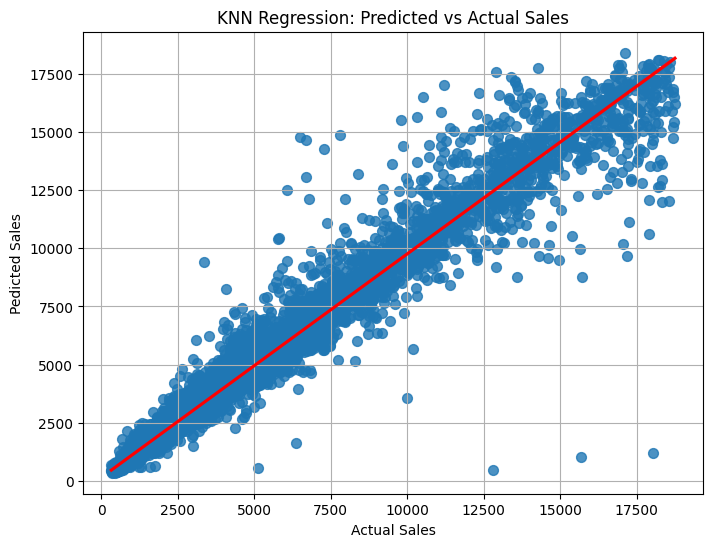

In [28]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_y, y=pred, scatter_kws={"s":50}, line_kws={"color": "red"})
plt.xlabel('Actual Sales')
plt.ylabel('Pedicted Sales')
plt.title("KNN Regression: Predicted vs Actual Sales")
plt.grid(True)
plt.show()